In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.linear_model import LinearRegression
import itertools
import numpy as np
from scipy.optimize import minimize
warnings.filterwarnings('ignore')

In [37]:
directory = os.listdir('../data/cleanData/')
directory = [x for x in directory if x.find(".csv")!=-1]

In [38]:
player_shooting_behaviour = {}

In [39]:
for i in range(len(directory)):
    if directory[i].find('csv') == -1:
        continue
    data = pd.read_csv("../data/cleanData/" + directory[i], header=0)
    data = data[['percentage_of_TS', 'TSA','GS']].dropna()
    
    linReg = LinearRegression()
    linReg.fit(np.array(data.percentage_of_TS).reshape(-1,1), np.array(data.TSA).reshape(-1,1))
    
    if (data['GS'].sum() > 30):
        player_shooting_behaviour[(linReg.coef_[0][0], linReg.intercept_[0])] = directory[i].replace('-clean.csv','')

In [40]:
player_shooting_behaviour

{(0.1664933975317767, 0.4917564290684223): 'kyle-kuzma',
 (0.20970549633384283, 0.5244888393433912): 'monte-morris',
 (0.10403116047395491, 0.7030875590012093): 'daniel-gafford',
 (-0.24934378818880346, 0.6114309287031514): 'deni-avjida',
 (0.04085924440005604, 0.6125685521532808): 'kristaps-porzingis',
 (-0.20308951183896198, 0.6553475654609318): 'bradley-beal',
 (-0.595328857830382, 0.7136755922768923): 'corey-kispert'}

In [41]:
experinced_player_names = list(player_shooting_behaviour.values())
experinced_player_names

['kyle-kuzma',
 'monte-morris',
 'daniel-gafford',
 'deni-avjida',
 'kristaps-porzingis',
 'bradley-beal',
 'corey-kispert']

In [42]:
experinced_player_TSA_model = list(player_shooting_behaviour.keys())
experinced_player_TSA_model

[(0.1664933975317767, 0.4917564290684223),
 (0.20970549633384283, 0.5244888393433912),
 (0.10403116047395491, 0.7030875590012093),
 (-0.24934378818880346, 0.6114309287031514),
 (0.04085924440005604, 0.6125685521532808),
 (-0.20308951183896198, 0.6553475654609318),
 (-0.595328857830382, 0.7136755922768923)]

# Global optimum shooting strategy based on modelling of players TSA on % of total shots taken

We have already calculated the TSA (True shooting accuracy) of each player. We have modeled their TSA with respect to percent of team shots they took. To calculate the overall utility by each player we use the formula

utility(i) = x*(player_model)

In [43]:


# Define the objective function to be maximized
def objective(x):
    f = 0
    f += x[0]*(slope1*x[0] + intercept1)
    f += x[1]*(slope2*x[1] + intercept2)
    f += x[2]*(slope3*x[2] + intercept3)
    f += x[3]*(slope4*x[3] + intercept4)
    f += x[4]*(slope5*x[4] + intercept5)
    return -f

# Define the constraint functions
def constraint1(x):
    return x[0] + x[1] + x[2] + x[3] + x[4] - 1

def constraint2(x):
    return x[0] - 0.01
def constraint3(x):
    return x[1] - 0.01
def constraint4(x):
    return x[2] - 0.01
def constraint5(x):
    return x[3] - 0.01
def constraint6(x):
    return x[4] - 0.01
def constraint7(x):
    return (slope1*x[0] + intercept1)
def constraint8(x):
    return (slope2*x[1] + intercept2)
def constraint9(x):
    return (slope3*x[2] + intercept3)
def constraint10(x):
    return (slope4*x[3] + intercept4)
def constraint11(x):
    return (slope5*x[4] + intercept5)
def constraint12(x):
    return (0.40 - x[0])
def constraint13(x):
    return (0.40 - x[1])
def constraint14(x):
    return (0.40 - x[2])
def constraint15(x):
    return (0.40 - x[3])
def constraint16(x):
    return (0.40 - x[4])

# Define the initial guess
x0 = [0.2, 0.2, 0.2, 0.2, 0.2]

# Define the bounds of the variables
bounds = [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

# Define the constraints
cons = [{'type': 'eq', 'fun': constraint1}]
cons.append({'type': 'ineq', 'fun': constraint2})
cons.append({'type': 'ineq', 'fun': constraint3})
cons.append({'type': 'ineq', 'fun': constraint4})
cons.append({'type': 'ineq', 'fun': constraint5})
cons.append({'type': 'ineq', 'fun': constraint6})
cons.append({'type': 'ineq', 'fun': constraint7})
cons.append({'type': 'ineq', 'fun': constraint8})
cons.append({'type': 'ineq', 'fun': constraint9})
cons.append({'type': 'ineq', 'fun': constraint10})
cons.append({'type': 'ineq', 'fun': constraint11})
cons.append({'type': 'ineq', 'fun': constraint12})
cons.append({'type': 'ineq', 'fun': constraint13})
cons.append({'type': 'ineq', 'fun': constraint14})
cons.append({'type': 'ineq', 'fun': constraint15})
cons.append({'type': 'ineq', 'fun': constraint16})

# # Use the minimize function to find the maximum
# # res = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)
# res = minimize(objective, x0, method='nelder-mead', bounds=bounds, constraints=cons)


In [44]:
slope1 = 0
intercept1 = 0
slope2 = 0
intercept2 = 0
slope3 = 0
intercept3 = 0
slope4 = 0
intercept4 = 0
slope5 = 0
intercept5 = 0
max_utility_for_max_score = -10000000
players_id = None
shooting_percentage_distribution = None
for i in range(len(experinced_player_names)):
    for j in range(i+1, len(experinced_player_names)):
        for k in range(j+1, len(experinced_player_names)):
            for l in range(k+1, len(experinced_player_names)):
                for m in range(l+1, len(experinced_player_names)):
                    slope1 = experinced_player_TSA_model[i][0]
                    intercept1 = experinced_player_TSA_model[i][1]
                    slope2 = experinced_player_TSA_model[j][0]
                    intercept2 = experinced_player_TSA_model[j][1]
                    slope3 = experinced_player_TSA_model[k][0]
                    intercept3 = experinced_player_TSA_model[k][1]
                    slope4 = experinced_player_TSA_model[l][0]
                    intercept4 = experinced_player_TSA_model[l][1]
                    slope5 = experinced_player_TSA_model[m][0]
                    intercept5 = experinced_player_TSA_model[m][1]
                    print("Starting for players: " + str(i) + " " + str(j) + " " + str(k) + " " + str(l) + " " + str(m))
                    res = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)
                    if -res.fun > max_utility_for_max_score:
                        max_utility_for_max_score = -res.fun
                        players_id = [i,j,k,l,m]
                        shooting_percentage_distribution = res.x
                    print("Shooting distribution:", res.x)
                    print("\n")

Starting for players: 0 1 2 3 4
Shooting distribution: [0.01       0.09849748 0.4        0.09150252 0.4       ]


Starting for players: 0 1 2 3 5
Shooting distribution: [0.01       0.4        0.4        0.03675389 0.15324611]


Starting for players: 0 1 2 3 6
Shooting distribution: [0.01       0.4        0.4        0.07338955 0.11661045]


Starting for players: 0 1 2 4 5
Shooting distribution: [0.01 0.01 0.4  0.4  0.18]


Starting for players: 0 1 2 4 6
Shooting distribution: [0.01       0.04802385 0.4        0.4        0.14197615]


Starting for players: 0 1 2 5 6
Shooting distribution: [0.01       0.4        0.4        0.10595577 0.08404423]


Starting for players: 0 1 3 4 5
Shooting distribution: [0.01       0.4        0.03675389 0.4        0.15324611]


Starting for players: 0 1 3 4 6
Shooting distribution: [0.01       0.4        0.07338956 0.4        0.11661044]


Starting for players: 0 1 3 5 6
Shooting distribution: [0.01       0.4        0.14962785 0.29183028 0.14854187]


Star

In [45]:
print("Maximum utility achieved: " + str(max_utility_for_max_score))
print("The players who should play the entire game: " + str(players_id))
print("Percentage of shot each person should take: " + str(shooting_percentage_distribution))

Maximum utility achieved: 0.6784679074329051
The players who should play the entire game: [2, 3, 4, 5, 6]
Percentage of shot each person should take: [0.4        0.01       0.4        0.10514345 0.08485655]


In [46]:
df_global_optimum_shooting_strategy = pd.DataFrame()
player_name = []
actual_total_shots_percentage = []
for i in range(len(players_id)):
    player_name.append(experinced_player_names[players_id[i]])
    temp = pd.read_csv("../data/cleanData/" + experinced_player_names[players_id[i]] + "-clean.csv")
    actual_total_shots_percentage.append(temp.percentage_of_TS.mean())
df_global_optimum_shooting_strategy['player_name'] = player_name
df_global_optimum_shooting_strategy['ideal_total_shots_percentage'] = shooting_percentage_distribution
df_global_optimum_shooting_strategy['actual_total_shots_percentage'] = actual_total_shots_percentage
df_global_optimum_shooting_strategy['maximum_utility'] = max_utility_for_max_score
df_global_optimum_shooting_strategy = df_global_optimum_shooting_strategy.round(decimals=3)

In [47]:
df_global_optimum_shooting_strategy

,player_name,ideal_total_shots_percentage,actual_total_shots_percentage,maximum_utility
0,daniel-gafford,0.400,0.208,0.678
1,deni-avjida,0.010,0.191,0.678
2,kristaps-porzingis,0.400,0.361,0.678
3,bradley-beal,0.105,0.342,0.678
4,corey-kispert,0.085,0.167,0.678


<hr style="border:2px solid gray">

# Players shooting strategy based on Nash equilibrium (players playing to contribute equally to overall team utility)

Players are playing to equate their contribution to the overall team's utility

In [13]:
# Define the objective function to be maximized
def objective_nash(x):
    f = 0
    f += x[0]*(slope1*x[0] + intercept1)
    f += x[1]*(slope2*x[1] + intercept2)
    f += x[2]*(slope3*x[2] + intercept3)
    f += x[3]*(slope4*x[3] + intercept4)
    f += x[4]*(slope5*x[4] + intercept5)
    return -f

# Define the constraint functions
def constraint1_nash(x):
    return x[0] + x[1] + x[2] + x[3] + x[4] - 1

def constraint2_nash(x):
    return x[0]-0.01
def constraint3_nash(x):
    return x[1]-0.01
def constraint4_nash(x):
    return x[2]-0.01
def constraint5_nash(x):
    return x[3]-0.01
def constraint6_nash(x):
    return x[4]-0.01
def constraint7_nash(x):
    return (x[0]*(slope1*x[0] + intercept1)) - (x[1]*(slope2*x[1] + intercept2))
def constraint8_nash(x):
    return (x[1]*(slope2*x[1] + intercept2)) - (x[2]*(slope3*x[2] + intercept3))
def constraint9_nash(x):
    return (x[2]*(slope3*x[2] + intercept3)) - (x[3]*(slope4*x[3] + intercept4))
def constraint10_nash(x):
    return (x[3]*(slope4*x[3] + intercept4)) - (x[4]*(slope5*x[4] + intercept5))
def constraint11_nash(x):
    return (0.40 - x[0])
def constraint12_nash(x):
    return (0.40 - x[0])
def constraint13_nash(x):
    return (0.40 - x[0])
def constraint14_nash(x):
    return (0.40 - x[0])
def constraint15_nash(x):
    return (0.40 - x[0])

# Define the initial guess
x0_nash = [0.2, 0.2, 0.2, 0.2, 0.2]

# Define the bounds of the variables
bounds_nash = [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

# Define the constraints
cons_nash = []
cons_nash.append({'type': 'eq', 'fun': constraint1_nash})
cons_nash.append({'type': 'ineq', 'fun': constraint2_nash})
cons_nash.append({'type': 'ineq', 'fun': constraint3_nash})
cons_nash.append({'type': 'ineq', 'fun': constraint4_nash})
cons_nash.append({'type': 'ineq', 'fun': constraint5_nash})
cons_nash.append({'type': 'ineq', 'fun': constraint6_nash})
cons_nash.append({'type': 'eq', 'fun': constraint7_nash})
cons_nash.append({'type': 'eq', 'fun': constraint8_nash})
cons_nash.append({'type': 'eq', 'fun': constraint9_nash})
cons_nash.append({'type': 'eq', 'fun': constraint10_nash})
cons_nash.append({'type': 'ineq', 'fun': constraint11_nash})
cons_nash.append({'type': 'ineq', 'fun': constraint12_nash})
cons_nash.append({'type': 'ineq', 'fun': constraint13_nash})
cons_nash.append({'type': 'ineq', 'fun': constraint14_nash})
cons_nash.append({'type': 'ineq', 'fun': constraint15_nash})

# # Use the minimize function to find the maximum
# # res = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)
# res = minimize(objective, x0, method='nelder-mead', bounds=bounds, constraints=cons)


In [14]:
slope1 = 0
intercept1 = 0
slope2 = 0
intercept2 = 0
slope3 = 0
intercept3 = 0
slope4 = 0
intercept4 = 0
slope5 = 0
intercept5 = 0
max_utility_for_max_score = -10000000
players_id = None
shooting_percentage_distribution = None
for i in range(len(experinced_player_names)):
    for j in range(i+1, len(experinced_player_names)):
        for k in range(j+1, len(experinced_player_names)):
            for l in range(k+1, len(experinced_player_names)):
                for m in range(l+1, len(experinced_player_names)):
                    slope1 = experinced_player_TSA_model[i][0]
                    intercept1 = experinced_player_TSA_model[i][1]
                    slope2 = experinced_player_TSA_model[j][0]
                    intercept2 = experinced_player_TSA_model[j][1]
                    slope3 = experinced_player_TSA_model[k][0]
                    intercept3 = experinced_player_TSA_model[k][1]
                    slope4 = experinced_player_TSA_model[l][0]
                    intercept4 = experinced_player_TSA_model[l][1]
                    slope5 = experinced_player_TSA_model[m][0]
                    intercept5 = experinced_player_TSA_model[m][1]
                    print("Starting for players: " + str(i) + " " + str(j) + " " + str(k) + " " + str(l) + " " + str(m))
                    res = minimize(objective_nash, x0_nash, method='SLSQP', bounds=bounds_nash, constraints=cons_nash)
                    if (-res.fun) > max_utility_for_max_score:
                        max_utility_for_max_score = -res.fun
                        players_id = [i,j,k,l,m]
                        shooting_percentage_distribution = res.x
                    print("Shooting distribution:", res.x)
                    print("\n")

Starting for players: 0 1 2 3 4
Shooting distribution: [0.22393447 0.20849675 0.16449632 0.21210569 0.19096676]


Starting for players: 0 1 2 3 5
Shooting distribution: [0.22367189 0.20825373 0.16429465 0.21181167 0.19196807]


Starting for players: 0 1 2 3 6
Shooting distribution: [0.22231642 0.20699924 0.16325389 0.21029599 0.19713447]


Starting for players: 0 1 2 4 5
Shooting distribution: [0.22827481 0.21251317 0.16783278 0.19488374 0.19649551]


Starting for players: 0 1 2 4 6
Shooting distribution: [0.22665988 0.21101885 0.16659074 0.1934254  0.20230513]


Starting for players: 0 1 2 5 6
Shooting distribution: [0.22635673 0.21073833 0.16635767 0.19460564 0.20194163]


Starting for players: 0 1 3 4 5
Shooting distribution: [0.21829627 0.20327811 0.20582099 0.18589045 0.18671419]


Starting for players: 0 1 3 4 6
Shooting distribution: [0.21717675 0.20224173 0.20458017 0.18488411 0.19111723]


Starting for players: 0 1 3 5 6
Shooting distribution: [0.21703341 0.20210903 0.20442147

In [15]:
print("Maximum utility achieved: " + str(max_utility_for_max_score))
print("The players who should play the entire game: " + str(players_id))
print("Percentage of shot each person should take: " + str(shooting_percentage_distribution))

Maximum utility achieved: 0.6188666297971945
The players who should play the entire game: [1, 2, 4, 5, 6]
Percentage of shot each person should take: [0.21713717 0.17168141 0.1994041  0.20144191 0.21033541]


In [16]:
df_nash_equilibrium_shooting_strategy = pd.DataFrame()
player_name = []
actual_total_shots_percentage = []
for i in range(len(players_id)):
    player_name.append(experinced_player_names[players_id[i]])
    temp = pd.read_csv("../data/cleanData/" + experinced_player_names[players_id[i]] + "-clean.csv")
    actual_total_shots_percentage.append(temp.percentage_of_TS.mean())
df_nash_equilibrium_shooting_strategy['player_name'] = player_name
df_nash_equilibrium_shooting_strategy['ideal_total_shots_percentage'] = shooting_percentage_distribution
df_nash_equilibrium_shooting_strategy['actual_total_shots_percentage'] = actual_total_shots_percentage
df_nash_equilibrium_shooting_strategy['maximum_utility'] = max_utility_for_max_score
df_nash_equilibrium_shooting_strategy = df_nash_equilibrium_shooting_strategy.round(decimals=3)

In [17]:
df_nash_equilibrium_shooting_strategy

,player_name,ideal_total_shots_percentage,actual_total_shots_percentage,maximum_utility
0,monte-morris,0.217,0.188,0.619
1,daniel-gafford,0.172,0.208,0.619
2,kristaps-porzingis,0.199,0.361,0.619
3,bradley-beal,0.201,0.342,0.619
4,corey-kispert,0.210,0.167,0.619


<hr style="border:2px solid gray">

# Shooting strategy where everyone is taking equal percentage of shots

Everyone will take equal percentage of shots. Since there are 5 players, each player will take 20% of overall shots.

In [18]:
# Define the objective function to be maximized
def objective_eps(x):
    f = 0
    f += x[0]*(slope1*x[0] + intercept1)
    f += x[1]*(slope2*x[1] + intercept2)
    f += x[2]*(slope3*x[2] + intercept3)
    f += x[3]*(slope4*x[3] + intercept4)
    f += x[4]*(slope5*x[4] + intercept5)
    return -f

# Define the constraint functions
def constraint1_eps(x):
    return x[0] + x[1] + x[2] + x[3] + x[4] - 1

def constraint2_eps(x):
    return x[0]-0.2
def constraint3_eps(x):
    return x[1]-0.2
def constraint4_eps(x):
    return x[2]-0.2
def constraint5_eps(x):
    return x[3]-0.2
def constraint6_eps(x):
    return x[4]-0.2

# Define the initial guess
x0_eps = [0.2, 0.2, 0.2, 0.2, 0.2]

# Define the bounds of the variables
bounds_eps = [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

# Define the constraints
cons_eps = []
cons_eps.append({'type': 'eq', 'fun': constraint1_eps})
cons_eps.append({'type': 'eq', 'fun': constraint2_eps})
cons_eps.append({'type': 'eq', 'fun': constraint3_eps})
cons_eps.append({'type': 'eq', 'fun': constraint4_eps})
cons_eps.append({'type': 'eq', 'fun': constraint5_eps})
cons_eps.append({'type': 'eq', 'fun': constraint6_eps})

# # Use the minimize function to find the maximum
# # res = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)
# res = minimize(objective, x0, method='nelder-mead', bounds=bounds, constraints=cons)


In [19]:
slope1 = 0
intercept1 = 0
slope2 = 0
intercept2 = 0
slope3 = 0
intercept3 = 0
slope4 = 0
intercept4 = 0
slope5 = 0
intercept5 = 0
max_utility_for_max_score = -10000000
players_id = None
shooting_percentage_distribution = None
for i in range(len(experinced_player_names)):
    for j in range(i+1, len(experinced_player_names)):
        for k in range(j+1, len(experinced_player_names)):
            for l in range(k+1, len(experinced_player_names)):
                for m in range(l+1, len(experinced_player_names)):
                    slope1 = experinced_player_TSA_model[i][0]
                    intercept1 = experinced_player_TSA_model[i][1]
                    slope2 = experinced_player_TSA_model[j][0]
                    intercept2 = experinced_player_TSA_model[j][1]
                    slope3 = experinced_player_TSA_model[k][0]
                    intercept3 = experinced_player_TSA_model[k][1]
                    slope4 = experinced_player_TSA_model[l][0]
                    intercept4 = experinced_player_TSA_model[l][1]
                    slope5 = experinced_player_TSA_model[m][0]
                    intercept5 = experinced_player_TSA_model[m][1]
                    print("Starting for players: " + str(i) + " " + str(j) + " " + str(k) + " " + str(l) + " " + str(m))
                    res = minimize(objective_eps, x0_eps, method='SLSQP', bounds=bounds_eps, constraints=cons_eps)
                    if (-res.fun) > max_utility_for_max_score:
                        max_utility_for_max_score = -res.fun
                        players_id = [i,j,k,l,m]
                        shooting_percentage_distribution = res.x
                    print("Shooting distribution:", res.x)
                    print("\n")

Starting for players: 0 1 2 3 4
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 2 3 5
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 2 3 6
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 2 4 5
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 2 4 6
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 2 5 6
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 3 4 5
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 3 4 6
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 3 5 6
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 1 4 5 6
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 2 3 4 5
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 2 3 4 6
Shooting distribution: [0.2 0.2 0.2 0.2 0.2]


Starting for players: 0 2 3 5 6
Shooting distributio

In [20]:
print("Maximum utility achieved: " + str(max_utility_for_max_score))
print("The players who should play the entire game: " + str(players_id))
print("Percentage of shot each person should take: " + str(shooting_percentage_distribution))

Maximum utility achieved: 0.6240807229086814
The players who should play the entire game: [1, 2, 4, 5, 6]
Percentage of shot each person should take: [0.2 0.2 0.2 0.2 0.2]


In [21]:
df_equal_percent_shooting_strategy = pd.DataFrame()
player_name = []
actual_total_shots_percentage = []
for i in range(len(players_id)):
    player_name.append(experinced_player_names[players_id[i]])
    temp = pd.read_csv("../data/cleanData/" + experinced_player_names[players_id[i]] + "-clean.csv")
    actual_total_shots_percentage.append(temp.percentage_of_TS.mean())
df_equal_percent_shooting_strategy['player_name'] = player_name
df_equal_percent_shooting_strategy['total_shots_percentage'] = shooting_percentage_distribution
df_equal_percent_shooting_strategy['actual_total_shots_percentage'] = actual_total_shots_percentage
df_equal_percent_shooting_strategy['maximum_utility'] = max_utility_for_max_score
df_equal_percent_shooting_strategy = df_equal_percent_shooting_strategy.round(decimals=3)

In [22]:
df_equal_percent_shooting_strategy

,player_name,total_shots_percentage,actual_total_shots_percentage,maximum_utility
0,monte-morris,0.2,0.188,0.624
1,daniel-gafford,0.2,0.208,0.624
2,kristaps-porzingis,0.2,0.361,0.624
3,bradley-beal,0.2,0.342,0.624
4,corey-kispert,0.2,0.167,0.624


<hr style="border:2px solid gray">

# Strategy where the player with highest intercept value in their model takes the shot the entire time

We have defined the model for every player using Linear Regression, where we have slope and intercept. Intercept is the ideal TSA value for a player given that they have not taken any shots yet.

In [23]:
def calculateTotalUtility(bestPlayer, players):
    totalUtility = 0
    totalUtility += 0.5*(experinced_player_TSA_model[bestPlayer][0]*0.5 + experinced_player_TSA_model[bestPlayer][1])
    for i in players:
        if i != bestPlayer:
            totalUtility += 0.125*(experinced_player_TSA_model[i][0]*0.125 + experinced_player_TSA_model[i][1])
            
    return totalUtility

In [24]:
slope1 = 0
intercept1 = 0
slope2 = 0
intercept2 = 0
slope3 = 0
intercept3 = 0
slope4 = 0
intercept4 = 0
slope5 = 0
intercept5 = 0
max_utility_for_max_score = -10000000
players_id = None
max_intercept_TSA = -1000000
max_intercept_TSA_playerId = None
shooting_percentage_distribution = None
for i in range(len(experinced_player_names)):
    for j in range(i+1, len(experinced_player_names)):
        for k in range(j+1, len(experinced_player_names)):
            for l in range(k+1, len(experinced_player_names)):
                for m in range(l+1, len(experinced_player_names)):
                    print("Starting for players: " + str(i) + " " + str(j) + " " + str(k) + " " + str(l) + " " + str(m))
                    if experinced_player_TSA_model[i][1] > max_intercept_TSA:
                        max_intercept_TSA = experinced_player_TSA_model[i][1]
                        max_intercept_TSA_playerId = i
                    if experinced_player_TSA_model[j][1] > max_intercept_TSA:
                        max_intercept_TSA = experinced_player_TSA_model[j][1]
                        max_intercept_TSA_playerId = j
                    if experinced_player_TSA_model[k][1] > max_intercept_TSA:
                        max_intercept_TSA = experinced_player_TSA_model[k][1]
                        max_intercept_TSA_playerId = k
                    if experinced_player_TSA_model[l][1] > max_intercept_TSA:
                        max_intercept_TSA = experinced_player_TSA_model[l][1]
                        max_intercept_TSA_playerId = l
                    if experinced_player_TSA_model[m][1] > max_intercept_TSA:
                        max_intercept_TSA = experinced_player_TSA_model[m][1]
                        max_intercept_TSA_playerId = m
                        
                    total_utility = calculateTotalUtility(max_intercept_TSA_playerId, (i,j,k,l,m))
                    if total_utility > max_utility_for_max_score:
                        max_utility_for_max_score = total_utility
                        players_id = [i,j,k,l,m]
                        shooting_percentage_distribution = 5*[0.15]
                        player_taking_all_shots = players_id.index(max_intercept_TSA_playerId)
                        shooting_percentage_distribution[player_taking_all_shots] = 0.4
                    print("Shooting distribution:", shooting_percentage_distribution)
                    print("\n")

Starting for players: 0 1 2 3 4
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 1 2 3 5
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 1 2 3 6
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 1 2 4 5
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 1 2 4 6
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 1 2 5 6
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 1 3 4 5
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 1 3 4 6
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 1 3 5 6
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 1 4 5 6
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 2 3 4 5
Shooting distribution: [0.15, 0.15, 0.4, 0.15, 0.15]


Starting for players: 0 2 3 4 6
Shooting di

In [25]:
print("Maximum utility achieved: " + str(max_utility_for_max_score))
print("The players who should play the entire game: " + str(players_id))
print("Percentage of shot each person should take: " + str(shooting_percentage_distribution))

Maximum utility achieved: 0.6617383773447969
The players who should play the entire game: [0, 1, 2, 3, 5]
Percentage of shot each person should take: [0.15, 0.15, 0.4, 0.15, 0.15]


In [26]:
df_one_player_taking_all_shots = pd.DataFrame()
player_name = []
actual_total_shots_percentage = []
for i in range(len(players_id)):
    player_name.append(experinced_player_names[players_id[i]])
    temp = pd.read_csv("../data/cleanData/" + experinced_player_names[players_id[i]] + "-clean.csv")
    actual_total_shots_percentage.append(temp.percentage_of_TS.mean())
df_one_player_taking_all_shots['player_name'] = player_name
df_one_player_taking_all_shots['total_shots_percentage'] = shooting_percentage_distribution
df_one_player_taking_all_shots['actual_total_shots_percentage'] = actual_total_shots_percentage
df_one_player_taking_all_shots['maximum_utility'] = max_utility_for_max_score
df_one_player_taking_all_shots = df_one_player_taking_all_shots.round(decimals=3)

In [27]:
df_one_player_taking_all_shots

,player_name,total_shots_percentage,actual_total_shots_percentage,maximum_utility
0,kyle-kuzma,0.15,0.326,0.662
1,monte-morris,0.15,0.188,0.662
2,daniel-gafford,0.40,0.208,0.662
3,deni-avjida,0.15,0.191,0.662
4,bradley-beal,0.15,0.342,0.662


# Model Comparison

Comparing the utility calculated in all the scenarios.

In [28]:
name_of_model = []
name_of_model.append('Best player taking majority % of shots')
name_of_model.append('Players taking % of shots to contribute equally to total team utility')
name_of_model.append('Players taking equal % of shots')
name_of_model.append('Players taking % shots based on their TSA model')

In [29]:
utility_measure = []
utility_measure.append(df_one_player_taking_all_shots.maximum_utility.mean())
utility_measure.append(df_nash_equilibrium_shooting_strategy.maximum_utility.mean())
utility_measure.append(df_equal_percent_shooting_strategy.maximum_utility.mean())
utility_measure.append(df_global_optimum_shooting_strategy.maximum_utility.mean())

In [30]:
df_model_comparison = pd.DataFrame()
df_model_comparison['model_name'] = name_of_model
df_model_comparison['utility_measure'] = utility_measure
df_model_comparison

,model_name,utility_measure
0,Best player taking majority % of shots,0.662
1,Players taking % of shots to contribute equall...,0.619
2,Players taking equal % of shots,0.624
3,Players taking % shots based on their TSA model,0.678


In [31]:
(df_model_comparison.iloc[3]['utility_measure'] - df_model_comparison.iloc[1]['utility_measure'])/df_model_comparison.iloc[1]['utility_measure']

0.09531502423263337

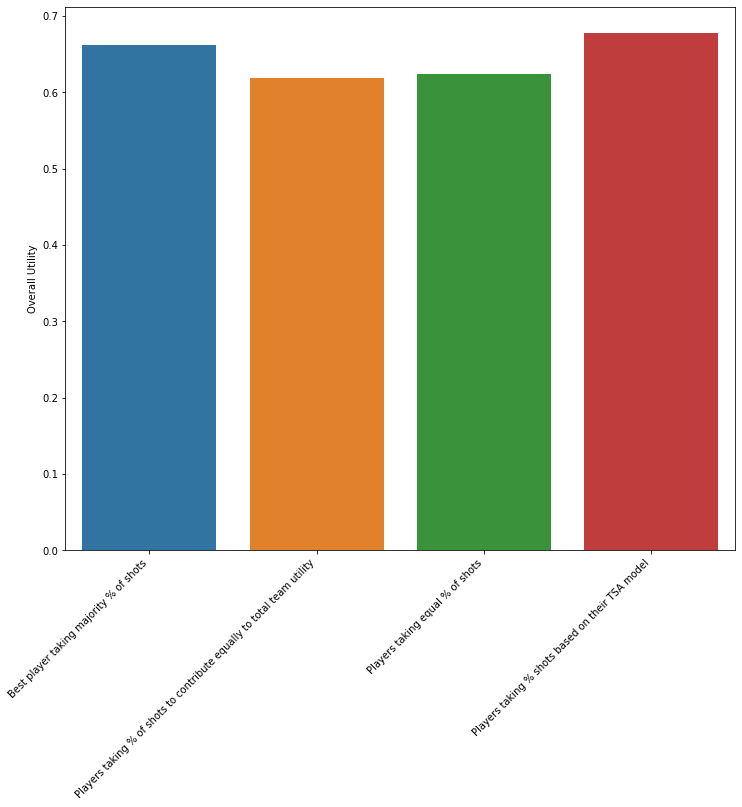

In [32]:
plt.figure(figsize=(12, 10))
chart = sns.barplot(x=name_of_model, y=utility_measure)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylabel('Overall Utility')
plt.show()